In [1]:
!python --version

Python 3.10.6


In [2]:
import warnings
warnings.filterwarnings('ignore')
import torch
import numpy as np
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import torchvision
import matplotlib.pyplot as plt
from torchvision import transforms

In [3]:
print(torch.__version__)

1.11.0+cu113


In [4]:
print(torchvision.__version__)

0.12.0+cu113


In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [6]:
root_input_dataset_dir = '/media/diffract/New Volume/datasets'
fmnist = torchvision.datasets.FashionMNIST(root_input_dataset_dir, download=True, train=True)

In [7]:
fmnist[6]

(<PIL.Image.Image image mode=L size=28x28>, 7)

In [8]:
image, label = fmnist[6]
image.show()

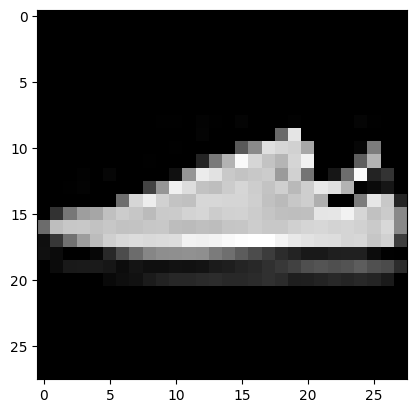

In [9]:
plt.imshow(image, cmap='gray')

In [10]:
fmnist = torchvision.datasets.FashionMNIST(root_input_dataset_dir, download=True, train=True, transform=transforms.ToTensor())

In [11]:
fmnist[6]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

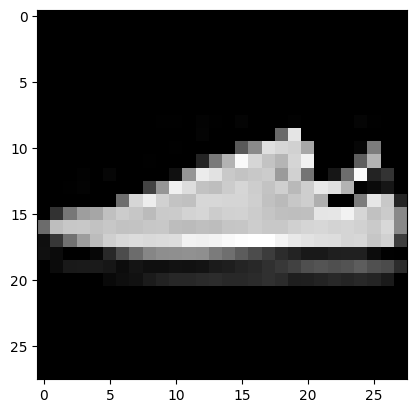

In [12]:
image = fmnist[6][0][0]
plt.imshow(image, cmap='gray')

In [13]:
train_images = fmnist.data
train_img_targets = fmnist.targets

print(train_images.shape, train_img_targets.shape)

torch.Size([60000, 28, 28]) torch.Size([60000])


label_x_rows  [    1     2     4 ... 59974 59985 59998]
label_x_rows  [   16    21    38 ... 59989 59991 59996]
label_x_rows  [    5     7    27 ... 59977 59981 59993]
label_x_rows  [    3    20    25 ... 59971 59980 59997]
label_x_rows  [   19    22    24 ... 59984 59986 59990]
label_x_rows  [    8     9    12 ... 59983 59995 59999]
label_x_rows  [   18    32    33 ... 59973 59987 59988]
label_x_rows  [    6    14    41 ... 59951 59979 59992]
label_x_rows  [   23    35    57 ... 59962 59967 59994]
label_x_rows  [    0    11    15 ... 59932 59970 59978]


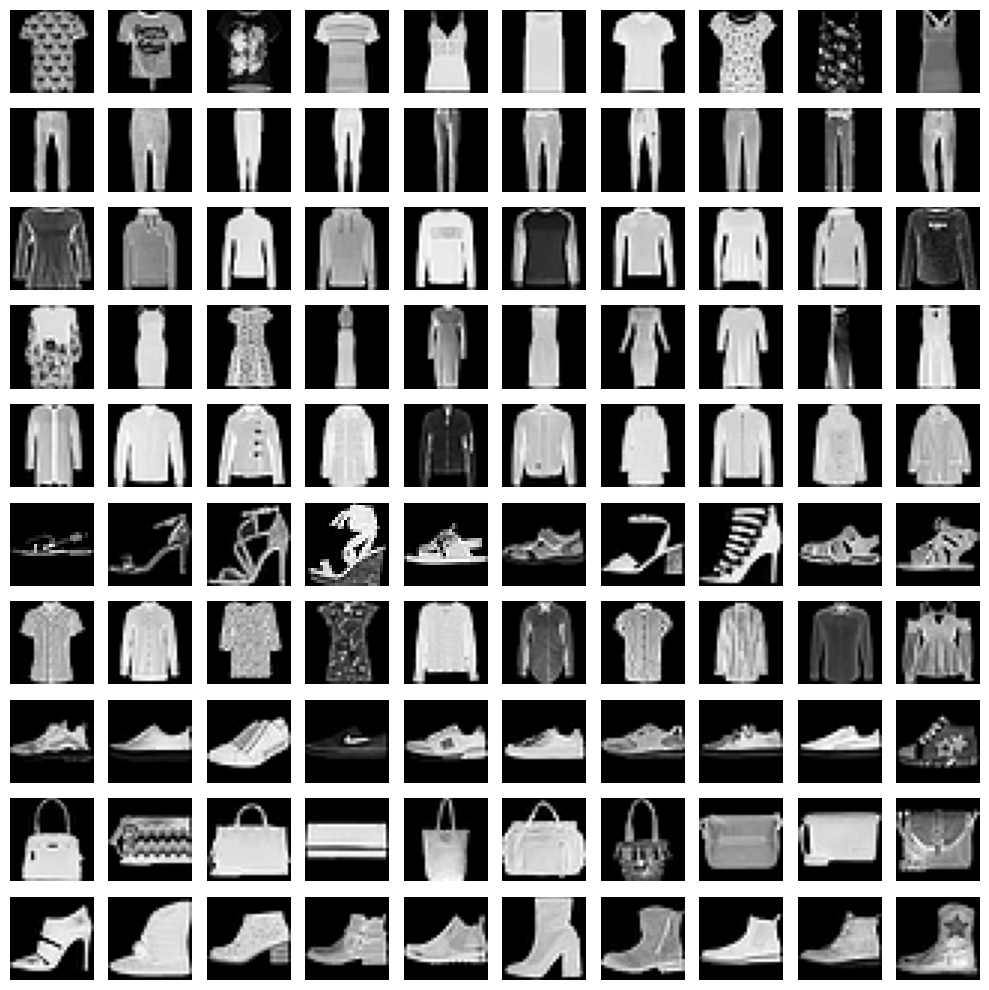

In [14]:
row, column = len(train_img_targets.unique()), 10

fig, ax = plt.subplots(row, column, figsize=(10,10))
for label_class, row_value in enumerate(ax):

    label_x_rows = np.where(train_img_targets == label_class)[0]

    print('label_x_rows ', label_x_rows)


    for plot_cell in row_value:
        plot_cell.grid(False); plot_cell.axis('off')

        rand_image_idx = np.random.choice(label_x_rows)
        x, y = train_images[rand_image_idx], train_images[rand_image_idx]
        plot_cell.imshow(x, cmap='gray')
plt.tight_layout()

In [15]:
fmnist_test = torchvision.datasets.FashionMNIST(root_input_dataset_dir, train=False, download=True)

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 192, 188, 181, 189,
         157, 165, 188, 176, 179, 181,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14, 235, 213, 213, 223,
         225, 217, 214, 204, 211, 189,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  22, 234, 217, 211, 217,
         200, 203, 217, 203, 179, 170,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0, 105, 252, 205, 209, 219,
         193, 195, 212, 207, 194, 204,  51,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0, 204, 228, 184, 206, 215,
         221, 212, 209, 199, 190, 227, 105,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0, 244, 192, 193, 212, 217,
         210, 216, 216, 194, 175, 225, 131,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

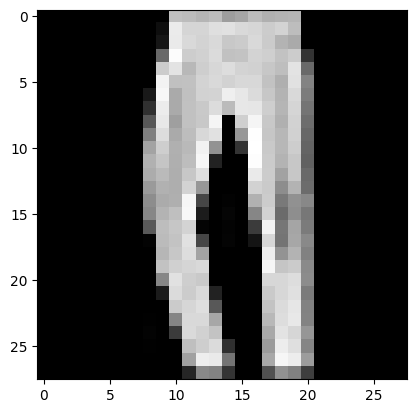

In [16]:
test_images = fmnist_test.data
test_images_targets = fmnist_test.targets

random_test_imgs = test_images[5]
print(random_test_imgs)
plt.imshow(random_test_imgs, cmap='gray')

In [17]:
class DataSetTransformer(Dataset):
    def __init__(self, x, y):
        x = x.float() / 255

        x = x.view(-1, 28 * 28)
        self.x, self.y = x, y

    def __getitem__(self, index):
        x, y = self.x[index], self.y[index]
        return x.to(device), y.to(device)

    def __len__(self):
        return len(self.x)


In [18]:
def load_data():
    train_data = DataSetTransformer(train_images, train_img_targets)
    train_loaded_data = DataLoader(train_data, batch_size=32, shuffle=True)

    test_data = DataSetTransformer(test_images, test_images_targets)
    test_loaded_data = DataLoader(test_data, len(test_images), shuffle=False)

    return train_loaded_data, test_loaded_data


In [19]:
from torch.optim import SGD
# def run_model():
#     model = nn.Sequential(
#         nn.Linear(28 * 28, 1000),
#         nn.ReLU(),
#         nn.Linear(1000, 10)
#     ).to(device)
#
#     loss_fn = nn.CrossEntropyLoss()
#     optimizer = SGD(model.parameters(), lr=0.001)
#     return model, loss_fn, optimizer

In [20]:
def run_model():
    class neuralnetwork(nn.Module):
        def __init__(self):
            super().__init__()
            self.input_to_hidden_layer = nn.Linear(784, 1000)
            self.batch_norm = nn.BatchNorm1d(1000)
            self.hidden_layer_activation = nn.ReLU()
            self.hidden_to_output_layer = nn.Linear(1000, 10)

        def forward(self, x):
            x = self.input_to_hidden_layer(x)
            fc0 = self.batch_norm(x)
            fc1 = self.hidden_layer_activation(fc0)
            fc2 = self.hidden_to_output_layer(fc1)
            return fc2, fc1

    model = neuralnetwork().to(device)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = SGD(model.parameters(), lr=0.01)
    return model, loss_fn, optimizer

In [21]:
@torch.no_grad()
# Backward propagation not needed during evaluation
def test_loss(x, y, model):
    prediction = model(x)[0]
    test_loss = loss_fn(prediction, y)
    return test_loss.item()

In [22]:
def train_each_batch(x, y, model, optimizer, loss_fn):
    model.train()
    prediction = model(x)[0]
    loss_batch = loss_fn(prediction, y)
    loss_batch.backward()

    optimizer.step()
    optimizer.zero_grad()
    return loss_batch.item()

In [23]:
@torch.no_grad()

def accuracy(x, y, model):
    model.eval()
    prediction = model(x)[0]
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()

In [24]:
training_data_loader, test_loaded_data = load_data()
model, loss_fn, optimizer = run_model()

In [31]:
train_losses, train_accuracies = [], []
test_losses, test_accuracies = [], []

for epoch in range(50):
    print(epoch)

    losses_in_this_epoch, train_accuracies_in_this_epoch = [], []

    for ix, batch in enumerate(iter(training_data_loader)):
        x, y = batch
        loss_for_this_batch = train_each_batch(x, y, model, optimizer, loss_fn)
        losses_in_this_epoch.append(loss_for_this_batch)

    train_epoch_loss = np.array(losses_in_this_epoch).mean()

    for ix, batch in enumerate(iter(training_data_loader)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_accuracies_in_this_epoch.extend(is_correct)
    epoch_accuracy = np.mean(train_accuracies_in_this_epoch)

    for ix, batch in enumerate(iter(test_loaded_data)):
        x, y = batch
        test_is_correct = accuracy(x, y, model)
        test_epoch_loss = test_loss(x, y, model)

    test_epoch_accuracy = np.mean(test_is_correct)

    train_losses.append(train_epoch_loss)
    train_accuracies.append(epoch_accuracy)

    test_losses.append(test_epoch_loss)
    test_accuracies.append(test_epoch_accuracy)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


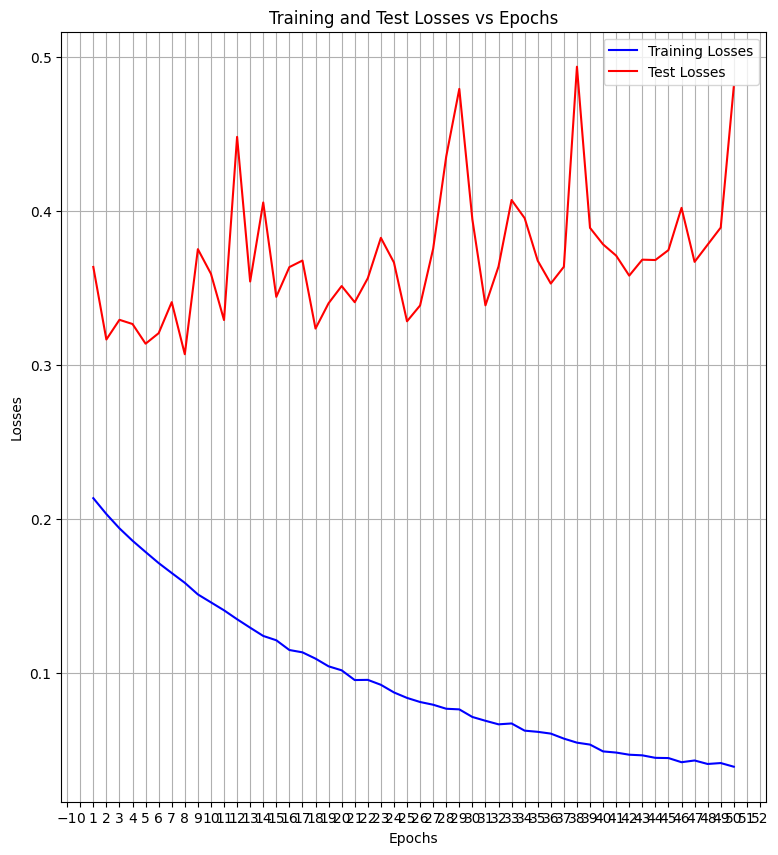

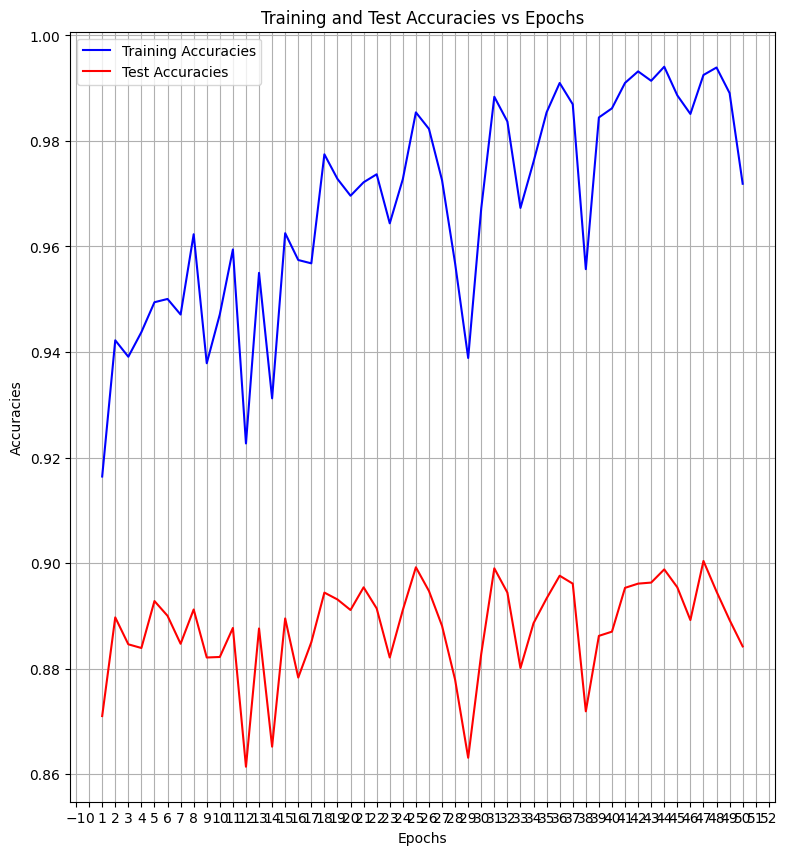

In [37]:
import matplotlib.ticker as mtick
import matplotlib.ticker as mticker

epochs = np.arange(50) + 1

plt.figure(figsize=(20,10))

plt.subplot(121)

plt.plot(epochs, train_losses, 'blue', label='Training Losses')
plt.plot(epochs, test_losses, 'r', label='Test Losses')

plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and Test Losses vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend()
plt.grid('off')
plt.show()

plt.figure(figsize=(20,10))

plt.subplot(122)

plt.plot(epochs, train_accuracies, 'blue', label='Training Accuracies')
plt.plot(epochs, test_accuracies, 'r', label='Test Accuracies')

plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))

plt.title('Training and Test Accuracies vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracies')
plt.legend()
plt.grid('off')
plt.show()

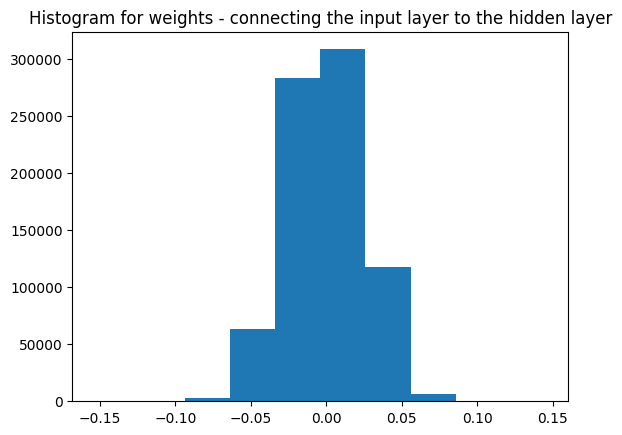

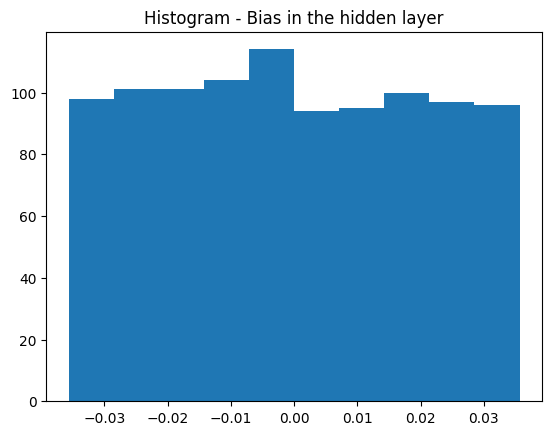

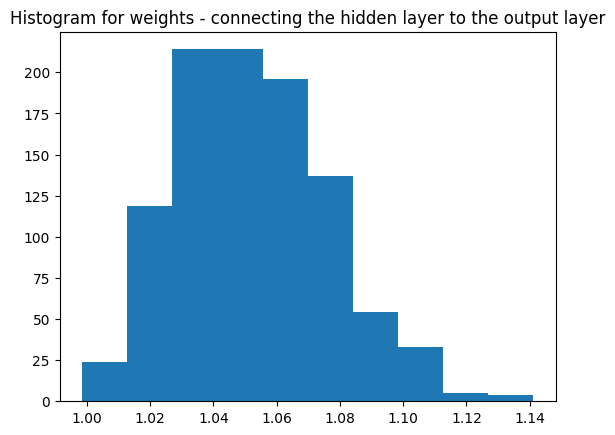

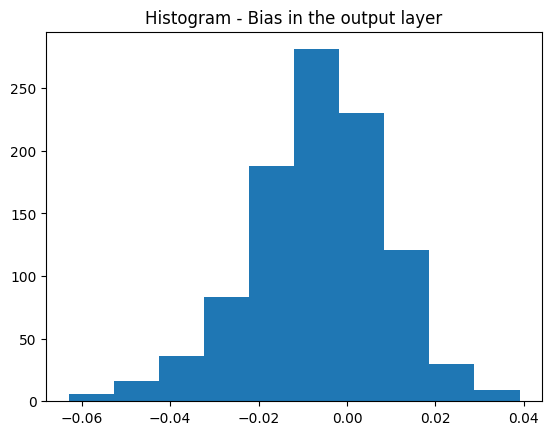

In [38]:
for ix, par in enumerate(model.parameters()):
    if ix==0:
        plt.hist(par.cpu().detach().numpy().flatten())
        plt.title("Histogram for weights - connecting the input layer to the hidden layer")
        plt.show()
    if ix==1:
        plt.hist(par.cpu().detach().numpy().flatten())
        plt.title("Histogram - Bias in the hidden layer")
        plt.show()
    if ix==2:
        plt.hist(par.cpu().detach().numpy().flatten())
        plt.title("Histogram for weights - connecting the hidden layer to the output layer")
        plt.show()
    if ix==3:
        plt.hist(par.cpu().detach().numpy().flatten())
        plt.title("Histogram - Bias in the output layer")
        plt.show()